# Project 2020 - Fundamentals of Data Analysis
This project performs and explains simple linear regression using the Python programming language. Using the *powerproduction* dataset, it sets out to accurately predict wind turbine power output from wind speed values

<br>
### Regression Analysis

Regression analysis is a statistical method which describes the relationship between a *dependent* variable and one or more *independent* variables [1]. It can be used to infer the nature of the relationship and consequently, can enable us to make predictions based on a known independent variable or establish causation relationships between variables. In machine learning, it is used primarily to build predictive models [2] and it is this use which will be investigated below.
<br>


### Simple linear regression
There are numerous types of regression analysis and choosing the most appropriate one depends on various factors, such as the nature of the data, the information the researcher is seeking to extract among others [3]. For this project, the 'powerproduction' dataset being analysed consists of two variables: wind speed and turbine power. Given that *simple linear regression* examines and summarises the relationship between two variables, this may be an appropriate model to predict the value of a dependent variable (turbine power) based on a known independent variable (wind speed). 

Linear regression, as implied by the name, involves fitting a straight line to observed data. Curved lines can also be used, depending on the relationship between the variables. Logistic and nonlinear regression may be used in these cases [4].




[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis<br>
[2] Malil, F; How Good is My Predictive Model - Regression Analysis; https://medium.com/fintechexplained/part-3-regression-analysis-bcfe15a12866 <br>
[3] Frost, J; Choosing the Correct Type of Regression Analysis; https://statisticsbyjim.com/regression/choosing-regression-analysis/ <br>
[4] Bevvans, R; An Introduction to Simple Linear Regression; https://www.scribbr.com/statistics/simple-linear-regression/ <br>



***

<br>



Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

<br>



Read in powerproduction.csv  

In [2]:
pp = pd.read_csv("powerproduction.csv")
pp.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


<br>



The describe() method gives us a summary overview of the dataset, including the mean, standard deviation and quartile distribution of both variables

In [3]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



Next, the variables are plotted on a scatterplot. Scatterplots allows us to visualise the relationship between two variables in a dataset. In the plot below, we can see that between 0 and approximately 9 units of wind speed, the power output of the wind turbine remains stable between 0 and approximately 10 **units**. From 10 to 17 **units** of wind speed, there is a notable increase in the power output. This levels off again from 18-25 **units**. This gives rise to a distinct *'s'* shape in the plot. It may be deduced at this point that a straight line might not be the best line to fit the data.

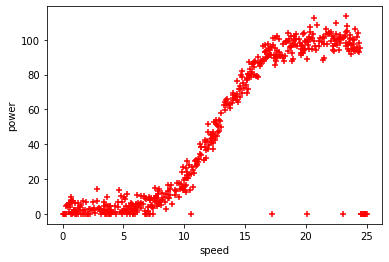

In [4]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')

<br>



Each column is separated from the dataset

In [5]:
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [6]:
power = pp.power
power

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

<br>



In [7]:
reg = LinearRegression()
reg.fit(speed_df, power)

LinearRegression()

In [8]:
reg.predict([[9.746]])

array([34.02698472])

In [9]:
reg.coef_

array([4.91759567])

In [10]:
reg.intercept_

-13.899902630519641

In [11]:
4.91759567*9.746 -13.899902630519641

34.02698476930036

In [12]:
rng = np.random.default_rng()

In [13]:
speed_list = 25 * rng.random(10) - 0

In [14]:
speed_arr = speed_list.reshape(-1, 1)
speed_arr

array([[17.25535139],
       [16.7263915 ],
       [ 2.49949083],
       [17.91799715],
       [10.80214658],
       [ 2.99344745],
       [18.48685975],
       [15.74680619],
       [17.20357085],
       [ 8.29549419]])

In [15]:
#speed_arr = speed_list.reshape(1, -1)

In [16]:
power_rand = reg.predict(speed_arr)
power_rand

array([70.95493855, 68.35372773, -1.60841734, 74.21356247, 39.22068657,
        0.82066157, 77.01099873, 63.53652322, 70.70030282, 26.89398363])

In [17]:
score = reg.score(speed_arr, power_rand)
score

1.0

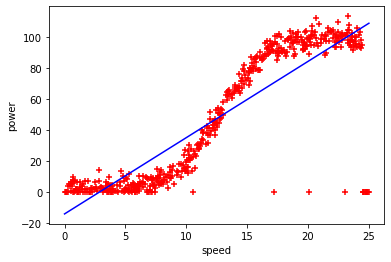

In [18]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp.speed,pp.power,color='red',marker='+')
plt.plot(pp.speed,reg.predict(pp[['speed']]),color='blue')

Fit line to data where turbine power most responsive

In [68]:
vmin = 7
vmax = 18
column = 'speed'


df1 = pp[pp[column].between(vmin, vmax)]
df1

,speed,power
138,7.057,1.485
139,7.082,9.779
140,7.107,0.000
141,7.157,7.973
142,7.182,0.067
...,...,...
354,17.643,102.322
355,17.793,100.429
356,17.818,93.105
357,17.843,91.270


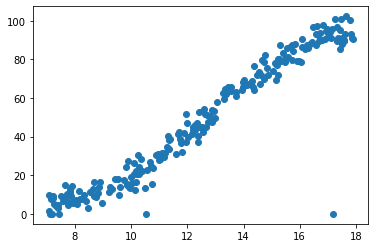

In [69]:
plt.scatter(df1.speed, df1.power)

In [70]:
A = df1.iloc[:, :-1].values
B = df1.iloc[:, 1].values

In [75]:
from sklearn.model_selection import train_test_split
A_Train, A_Test, B_Train, B_Test = train_test_split(A, B, test_size = 0.2)

In [76]:
reg.fit(A_Train, B_Train)

LinearRegression()

In [77]:
reg.predict(A_Test)

array([94.26543489, 33.81204415, 75.13664578, 55.53600692,  4.29312342,
       96.16227091, 48.69418546, 92.14211099, 73.48517164, 37.5868422 ,
       91.43433636, 81.75197936, 24.36561204, 79.15680571, 69.71037359,
       34.28389391,  3.34942391, 78.68495595, 13.97548041, 66.16206343,
       20.59081399, 81.28012961, 26.01708619, 36.17129293, 98.52151969,
       25.07338667, 62.85911513, 50.3456596 , 87.89546319, 64.2746644 ,
       95.69042116, 73.95702139, 67.58704969, 88.8391627 , 93.32173538,
       70.41814822, 10.908457  , 90.72656172, 51.76120887, -1.14258577,
       96.39819579, 83.63937839, 33.10426952, 90.01878709,  5.23682293])

In [79]:
B_Test

array([ 91.206,  31.153,  78.987,  62.83 ,  11.321,  89.569,  44.801,
        95.622,  69.248,  38.184,  94.093,  78.632,  13.657,  84.133,
        82.147,  28.452,   4.443,  87.285,  14.16 ,  64.221,   9.911,
        78.994,  12.624,  31.53 ,  93.105,  16.139,  66.55 ,  51.149,
        89.527,  67.263,  87.731,  80.183,  73.652,  90.171, 100.831,
        75.466,  11.422,  91.808,  47.787,   5.252,  90.142,  87.192,
        30.483,  90.761,   5.696])

In [81]:
reg.score(A_Test, B_Test)

0.9687872597001415

In [19]:
X = pp.iloc[:, :-1].values
Y = pp.iloc[:, 1].values

In [57]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=4380)

In [58]:
#X_Train

In [59]:
reg.fit(X_Train, Y_Train)

LinearRegression()

In [60]:
df_ytrain = pd.DataFrame(Y_Train)

In [61]:
df_xtrain = pd.DataFrame(X_Train)

In [52]:
'''
function to find random seed which produces the highest r-squared value
'''
def best_seed():
    scores = []
    for i in range(10000):
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state=i)
        reg.fit(X_Train, Y_Train)
        scores.append(reg.score(X_Test, Y_Test))
    return scores        

In [53]:
scores = best_seed()

In [67]:
min(scores)

-0.09741570609812222

In [54]:
max(scores)

0.9306242340561958

In [55]:
scores.index(0.9306242340561958)

4380

In [56]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


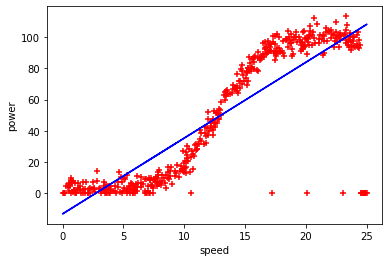

In [63]:
%matplotlib inline
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(df_xtrain,df_ytrain,color='red',marker='+')
plt.plot(df_xtrain,reg.predict(df_xtrain),color='blue')

In [62]:
df_xtrain.describe()

,0
count,450.000000
mean,12.758433
std,7.172378
min,0.000000
25%,6.794500
50%,12.763000
75%,18.787750
max,25.000000


In [27]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [28]:
pp[['speed']]

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [64]:
reg.predict(X_Test)

array([ 57.39780115,  11.74564594,  98.7725055 ,  17.48142954,
        79.60933052,  26.51431325,  10.64823836,  93.40252442,
       -12.17783924,  14.18920681,  16.50595614,  10.77017254,
        82.05289139,   4.18084971,   5.76599399,  19.07145119,
       103.65474987,  40.91717803,  -3.63269224,  -7.17366069,
        64.10905816,  54.71037193, -11.56816837,  -6.19330992,
        76.19029624,  94.86573452,  43.3607389 ,  47.87718075,
        37.13234123,   1.49342048,  16.62789032,  87.91060917,
       100.47958395,  79.36546217,  95.35347122,   0.88374961,
        42.0145856 ,  15.89628527, 103.28894735,  94.9876687 ,
        54.58843775,  75.58062537,  -9.85621255,  23.70982722,
        46.40909328,   4.91245476,  53.369096  ,   1.12761796,
        32.98657927,  34.3278552 ])

In [65]:
Y_Test

array([ 73.652,   4.525, 101.308,   5.842,  97.148,   7.785,   1.907,
       104.052,   0.   ,   3.036,   2.236,   1.681,  92.203,   9.89 ,
         0.132,  10.044, 105.992,  29.601,   0.   ,   0.   ,  78.991,
        65.596,   5.186,   5.352,  98.855,  96.65 ,  41.486,  54.079,
        22.216,   3.063,   5.347,  94.216, 104.977, 102.364, 100.206,
         2.894,  38.636,   3.912,  95.364,  93.931,  68.232,  90.751,
         0.   ,  14.788,  43.454,   0.   ,  61.127,   3.578,  18.042,
        24.164])

In [66]:
reg.score(X_Test, Y_Test)

0.9306242340561958

In [32]:
len(Y_Test)

50

In [33]:
len(X_Test)

50

In [34]:
x = pp["speed"]
y = pp["power"]

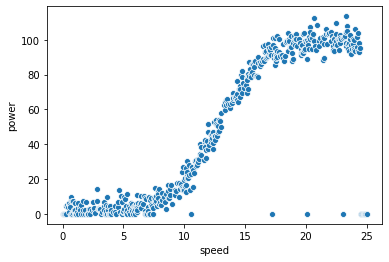

In [35]:
sns.scatterplot(x, y)

In [36]:
from scipy.stats import pearsonr 

In [37]:
corr, _ = pearsonr(pp["speed"], pp["power"]) 
print('Pearsons correlation: %f' % corr) 

Pearsons correlation: 0.853778


In [38]:
model = LinearRegression()

In [39]:
arr = pp.to_numpy()

In [40]:
#print(arr[:,0])

In [41]:
x = arr[:,0]

In [42]:
y = arr[:,1]

In [43]:
x = x.reshape(-1, 1)

In [44]:
x[:10]

array([[0.   ],
       [0.125],
       [0.15 ],
       [0.225],
       [0.275],
       [0.325],
       [0.4  ],
       [0.45 ],
       [0.501],
       [0.526]])

In [45]:
x[-10:]

array([[24.499],
       [24.525],
       [24.575],
       [24.65 ],
       [24.75 ],
       [24.775],
       [24.85 ],
       [24.875],
       [24.95 ],
       [25.   ]])

In [46]:
model.fit(x, y)

LinearRegression()

In [47]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7289360258564072


In [48]:
print('intercept:', model.intercept_)

intercept: -13.899902630519641


In [49]:
print('slope:', model.coef_)

slope: [4.91759567]


In [50]:
m = model.coef_

In [51]:
model.predict([[9.746]])

array([34.02698472])